# Importing Libraries

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Data Collection and Preprocessing

In [7]:
#Loading csv file.
data = pd.read_csv('cardekho.csv')

#Handling missing values.
data.fillna(method='ffill', inplace=True)

#Converting variables to numerical.
data = pd.get_dummies(data)

x = data.drop('price', axis=1) 
y = data['price']

In [8]:
#Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Model Selection
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Model Training and Model Evaluation

In [9]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")

Training Linear Regression...
Linear Regression - MAE: 89621.42673865787, MSE: 39781283323.45452, R2: 0.939310102770868
Training Random Forest...
Random Forest - MAE: 71465.6938883119, MSE: 26632790763.703865, R2: 0.9593693013563193


In [10]:
#Model Validation(Cross-Validation)
for name, model in models.items():
    cv_scores = cross_val_score(model, x, y, cv=5)
    print(f"{name} - Cross-validation scores: {cv_scores.mean()}")

#Model Deployment (using RandomForest)
joblib.dump(models['Random Forest'], 'car_price_model.pkl')

Linear Regression - Cross-validation scores: -343503368.43943805
Random Forest - Cross-validation scores: 0.939702332322604


['car_price_model.pkl']

# Visualization

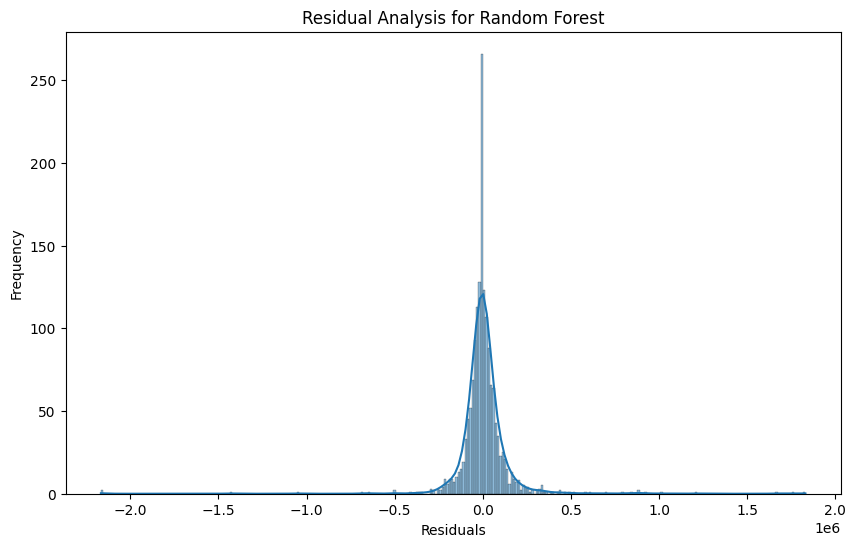

In [12]:
best_model_name = min(results, key=lambda k: results[k]['MAE'])
best_model = models[best_model_name]
y_pred = best_model.predict(x_test)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title(f'Residual Analysis for {best_model_name}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()